In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from LinearController_ import LinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

In [9]:
# Task 3.1

In [10]:
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPole(False)
model_3_1 = NonLinearObserver.initialize_model(N=14, M=9, with_action=True)
model_3_1.load_model("./models/3_1__14__9")

In [6]:
model_3_1.w.shape

(5120, 4)

Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]')

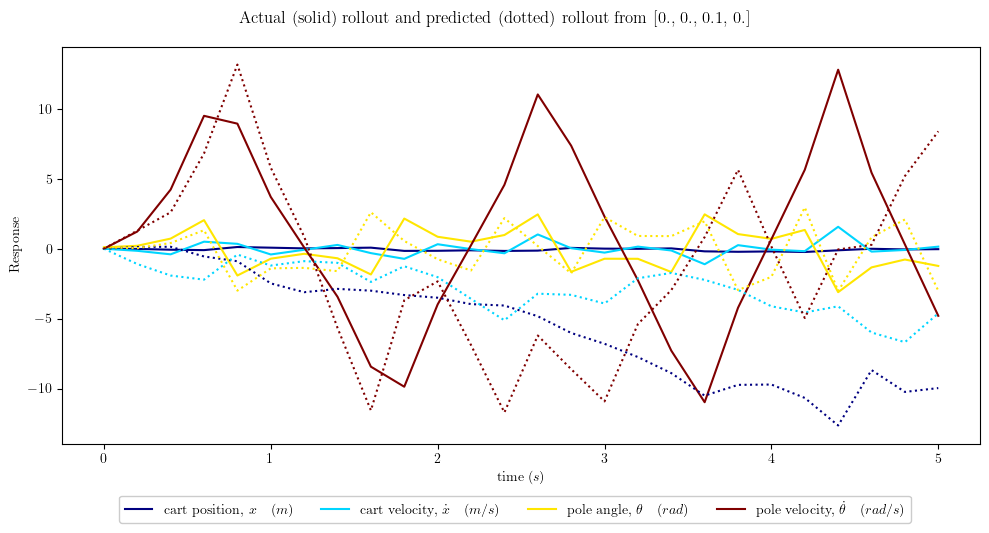

In [7]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')

s0 = np.array([0, 0, 0.1, 0, 0])
x, y = target_no_noise.simulate(time=5, state=s0, remap=True)
x_hat, y_hat = model_3_1.simulate(time=5, state=s0, remap=True)

plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)
plot_rollout_single(x_hat, y_hat, ax, fig, color=colors, linestyle='dotted', legend=False)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]')

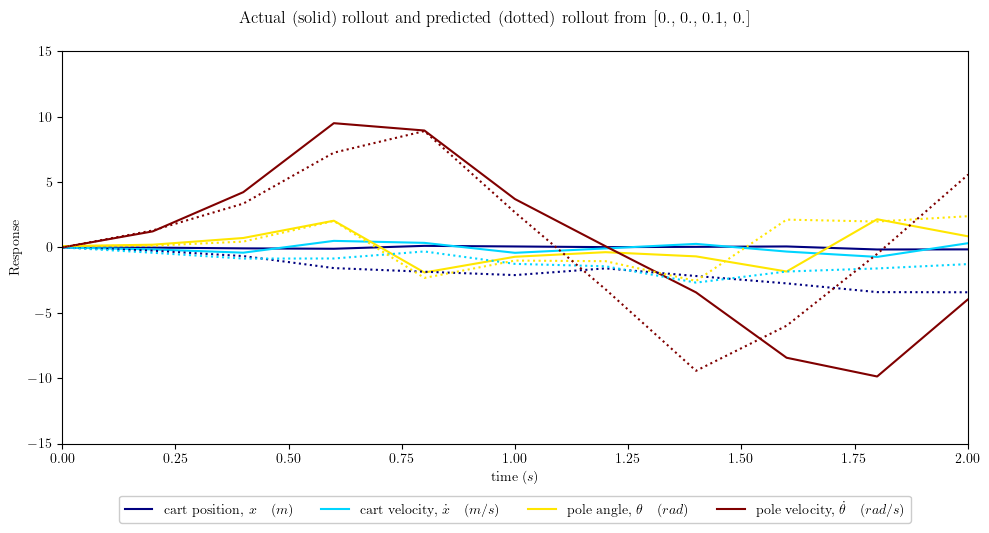

In [22]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')

s0 = np.array([0, 0, 0.1, 0, 0])
x, y = target_no_noise.simulate(time=5, state=s0, remap=True)
x_hat, y_hat = model_3_1.simulate(time=5, state=s0, remap=True)

plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)
plot_rollout_single(x_hat, y_hat, ax, fig, color=colors, linestyle='dotted', legend=False)
ax.set(ylim=(-15, 15), xlim=(0, 2))
lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

In [5]:
# Fit linear controller

[1.00096722 1.02418547 1.02907459 1.00509892]


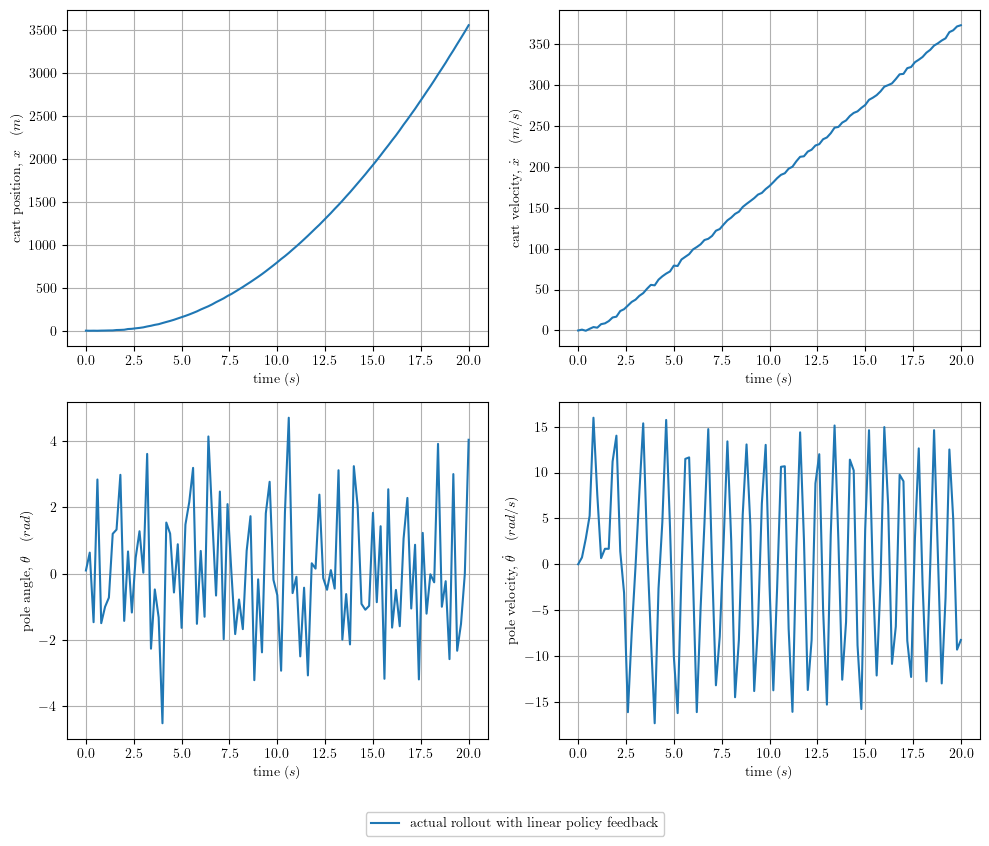

In [29]:
from optimizer import Optimizer

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1, 1, 1, 1])

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 9.98565148  6.16096004 -3.09452282 -9.52851245]
[-2.80517526 -6.13480603  1.2179381   4.39140547]
[-7.36692624  1.04741122 -1.16322959 -4.58638344]
[ 0.09090329 -1.42050219  2.4941284   9.50492572]
[ 3.77970897  3.12485897  0.62644069 14.6358545 ]
[-9.07541281 -4.08241985 -2.17020506 -1.60308996]
[-1.10952146  8.31039081  1.8082185   1.78783717]
[  6.72066034  -9.54027552  -0.18561177 -14.44854091]
[ 5.65867948  2.2208513   2.152519   -2.85617173]
[-1.6436561  -0.28459383 -0.75662087 11.31498585]
[ -8.16213212   7.09317061   0.04818971 -11.87401524]
[ 4.46356152 -5.63280535 -1.73909554  2.68966477]
[ 1.99935424  9.83193419 -1.35977729  7.03349186]
[-5.51053517 -7.8157539   3.02448821 -9.14875416]
[-4.83418423  4.41978235 -2.35493974  9.21150193]
[ 7.59007827 -2.7577292   1.04372474 -7.38067921]
[ 9.12464124  4.18957733 -0.42145279  0.27513047]
[ -3.80801916  -3.47806353   2.30549072 -13.88009471]
[-5.96946891  8.76736044 -1.61257847 14.099247  ]
[ 1.53049057 -8.42236952  0.37346057 -

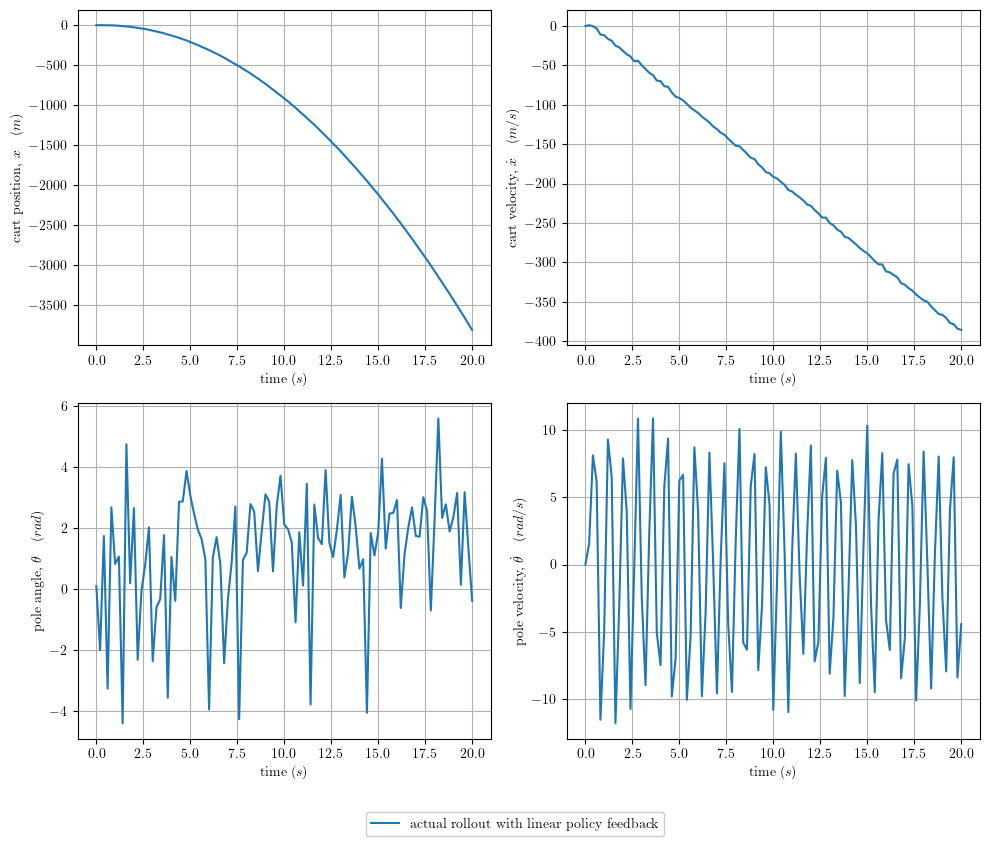

In [ ]:
from optimizer import Optimizer
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()

sobol_points = get_sobol_points(m=5, d=4)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')


s0 = np.array([0, 0, 0.1, 0, 0])

for p0 in sobol_points:
    p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
    print(p_opt)
    controller.p = optimizer.sol
    

print(f"final: {controller.p}")
x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 4.95448208  6.59779461  2.95445089 -4.88615787]


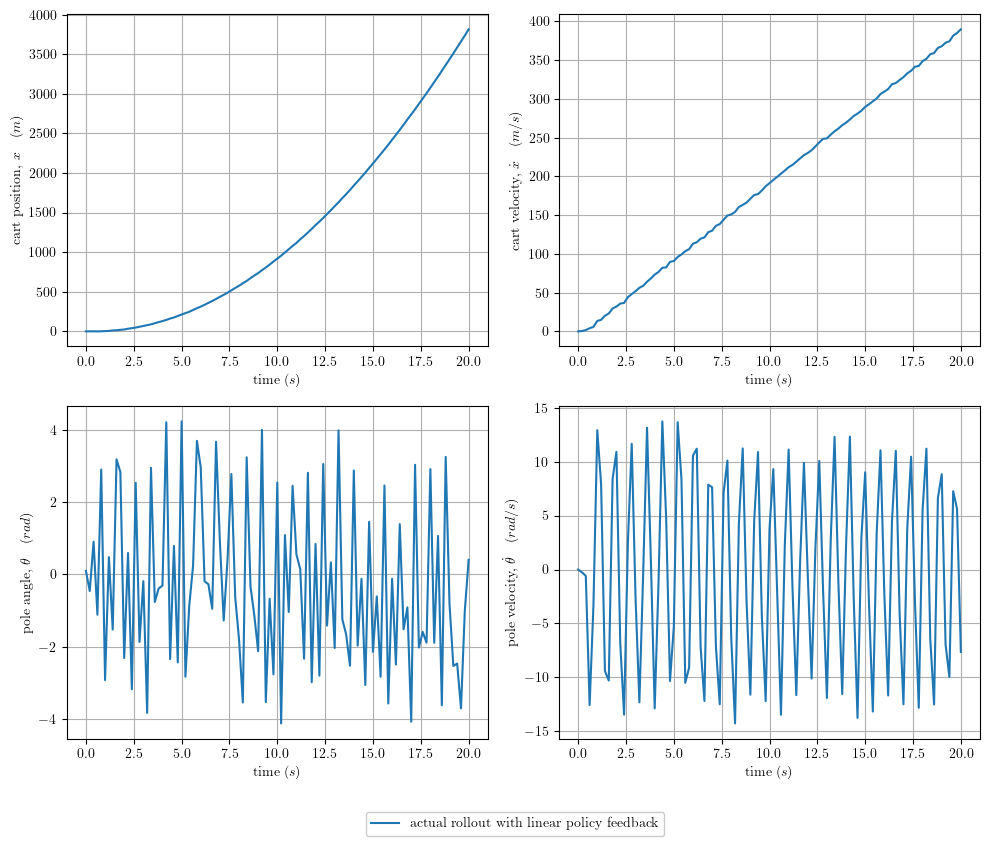

In [9]:
from optimizer import Optimizer

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 4.9543092,   6.28353097,  2.9543969,  -4.88635481])

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=2, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 9.83618979  6.33680217 -3.05557736 -9.40800515]
[-2.77179511 -6.42368323  1.18036677  4.30899   ]
[-7.07120058  1.07744045 -1.19454477 -4.52849795]
[ 0.09348594 -1.46028025  2.3193918   9.38737165]
[ 3.70776715  3.42058626  0.60257248 14.24491472]
[-8.60611421 -4.24179167 -2.15023291 -1.68017637]
[-1.05449576  8.31833445  1.84808327  1.76458666]
[  6.27538601  -9.00475348  -0.19634833 -14.57808978]
[ 6.14505018  2.15183559  2.00117423 -2.87008156]
[-1.68464473 -0.2651829  -0.78794895 11.68643566]
[ -7.93257611   7.61757481   0.04897599 -11.24275439]
[ 4.44083712 -5.23908174 -1.90410852  2.6446714 ]
[ 2.00469309  9.49997041 -1.35721234  7.36403528]
[-5.37300145 -7.91353667  3.13778668 -8.82182658]
[-4.55873712  4.50443824 -2.56332983  8.89252293]
[ 8.33379797 -2.87530227  0.98561887 -7.2665413 ]
[ 9.02174389  4.25172269 -0.39877781  0.28163277]
[ -3.90448944  -3.37386379   2.37707233 -13.44895168]
[-5.89529373  9.79899097 -1.63903456 13.42226403]
[ 1.48492336 -8.53645791  0.38686878 -

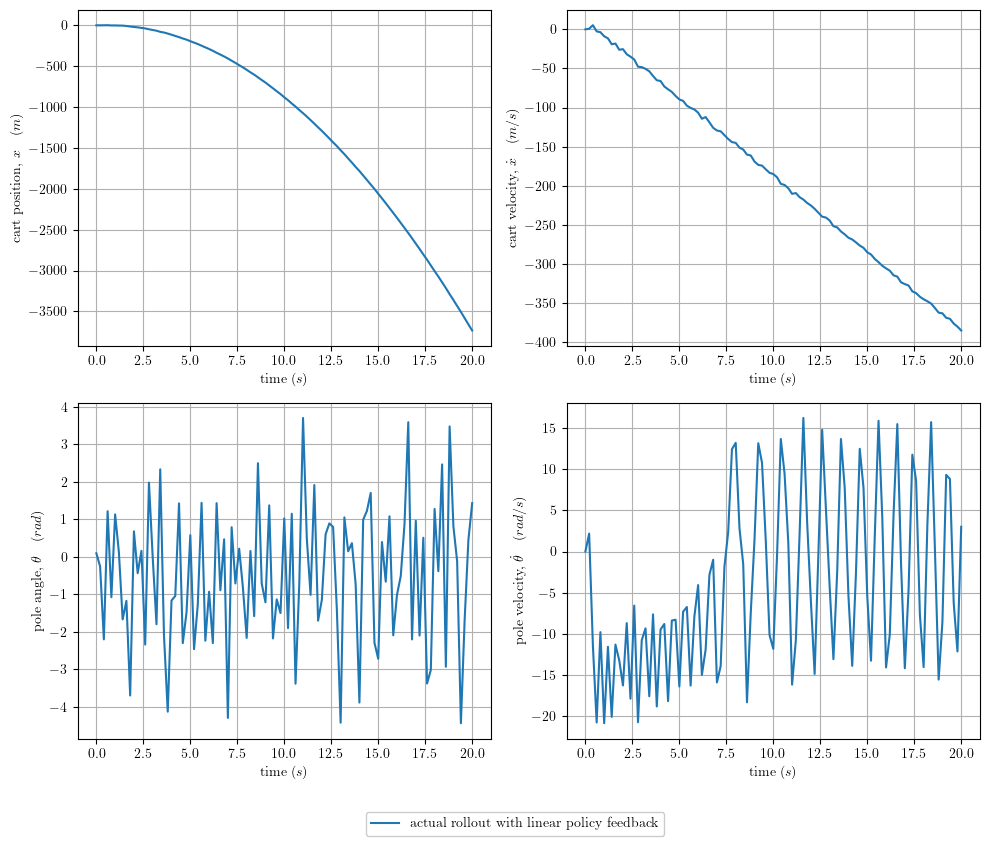

In [ ]:
from optimizer import Optimizer
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()

sobol_points = get_sobol_points(m=5, d=4)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')


s0 = np.array([0, 0, 0.1, 0, 0])

for p0 in sobol_points:
    p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=2, remap=True)
    print(p_opt)
    controller.p = optimizer.sol
    

print(f"final: {controller.p}")
x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[-4.65848292 -8.37795453  3.10484615 -8.87892935]


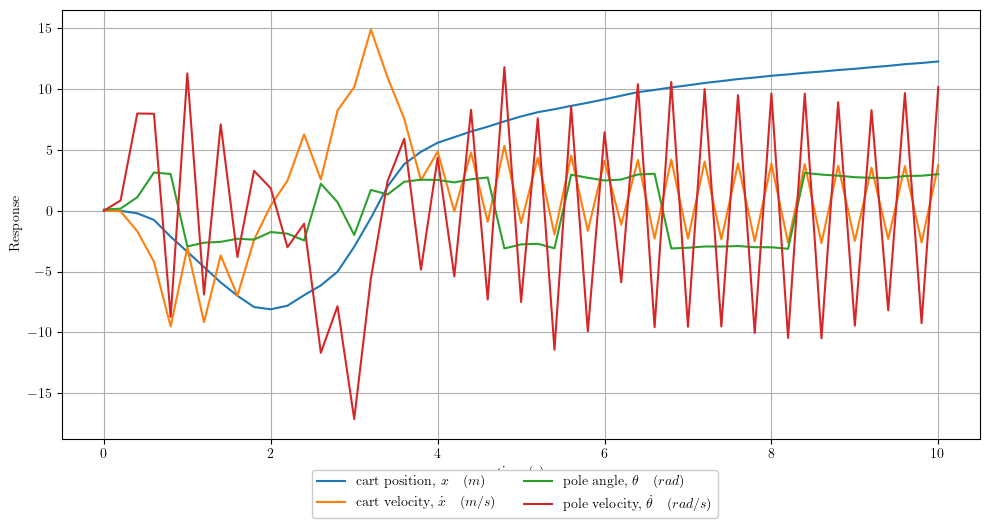

In [9]:
from optimizer import Optimizer
from shared import plot_rollout_single

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([-4.6586673, -7.9790244,  3.1047265, -8.8786991])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=2, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 1.83299915  2.23580982 17.21719068  3.09824831]


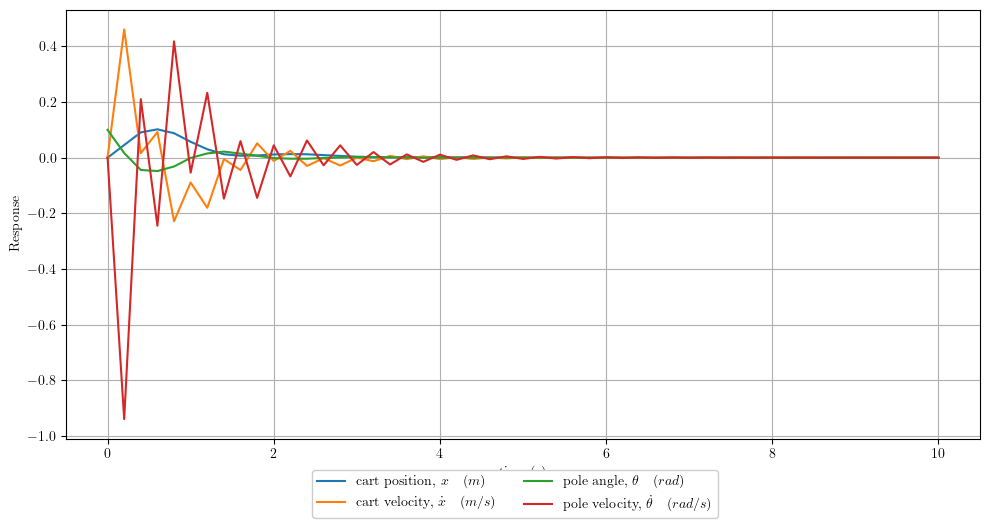

In [8]:
from optimizer import Optimizer
from shared import plot_rollout_single

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1.8,  2.2, 17.5,  3.15])
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [11]:
from optimizer import Optimizer
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObs
from shared import get_sobol_points

optimizer = Optimizer()
model = model_3_1
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1.8,  2.2, 17.5,  3.15])
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(model, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

[ 1.89818026  2.29894696 15.74625028  3.3538715 ]


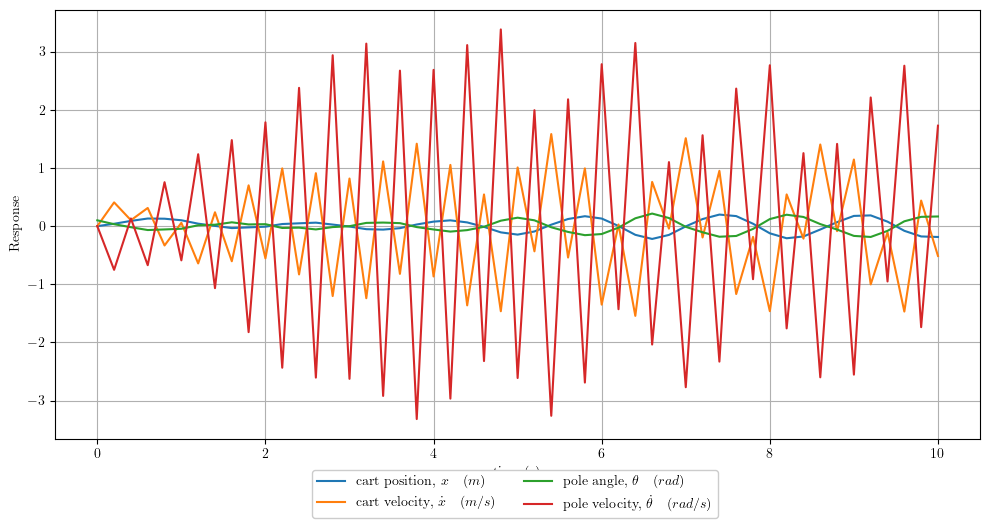

In [12]:
from shared import plot_rollout_single

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)